# Spektron on MNIST dataset 

In [3]:
import tensorflow as tf
from data import MNISTDataHandler
import numpy as np
import PIL.Image as pil
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import  graphviz_layout
import networkx as nx
import pandas as pd
import seaborn as sns

from modules.Components import Abstract, Context1, Context2, Actuator, Spektron
from modules.Veri import Veri
from modules.BaseStructure import BaseStructure
from pywt import wavedec
import random

In [4]:
def prepareImage(image,bands):
  arr = np.empty([28, 28], dtype=np.int)
  for i in range(28):
    for j in range(28):
      a=0
      for k in range(len(bands)):
        if(image[i][j] >=bands[k]):
          a=k+1
          break
      arr[i,j]=a
  return arr#(np.array(arr, dtype='int')).reshape(28,28)
######################################################################
def diffPrepareImage(image, nr_of_bands)    :
    #return (np.array(nr_of_bands*image, dtype='int')).reshape(28,28)
    image = image- np.min(image)    
    return (np.round(nr_of_bands*image/np.max(image)))
#def transformImage(image):
    
    
######################################################################
def takeSampleData(sample, nr_of_images, show =False):
  resimler = []
  batch_x, batch_y = dh.sample_pair(nr_of_images,sample) 
  
  for i in range(nr_of_images):
      resimler.append((np.array(batch_x[i], dtype='float')).reshape(28,28))
  return resimler
  for i in range(nr_of_images):
    testImage = (np.array(batch_x[i], dtype='float')).reshape(28,28)
    if(show):
      img = pil.fromarray(np.uint8(testImage * 255) , 'L')
      img.show()

  testImage = (np.array(batch_x[0], dtype='float')).reshape(28,28)
  return testImage

In [5]:
dh = MNISTDataHandler("/home/matei/Documents/code/taniyanAgac/MNIST_data", is_train=True)

Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/matei/Documents/code/taniyanAgac/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/matei/Documents/code/taniyanAgac/MNIST_data/train-labels-idx1-ubyte.gz


In [6]:
def ciz(testImage):
    plt.imshow(testImage, cmap='gray')
    plt.show()

In [7]:
imgs= []
for i in range(10):
  imgs.append(takeSampleData(i,20))
v=Veri()
imgs = v.mergeList(imgs)

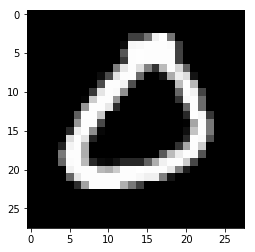

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 4 9 9 4 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 9 9 9 9 9 9 2 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 3 9 9 9 9 9 9 2 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 2 9 9 9 9 9 9 2 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 5 9 9 8 5 2 7 9 8 3 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 2 8 9 9 4 0 0 0 6 9 8 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 2 9 9 9 3 0 0 0 0 0 7 9 7 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 2 8 9 9 5 0 0 0 0 0 0 4 9 9 2 0 0 0 0 0 
0 0 0 0 0 0 0 0 8 9 9 5 0 0 0 0 0 0 0 2 9 9 4 0 0 0 0 0 
0 0 0 0 0 0 0 5 9 9 9 1 0 0 0 0 0 0 0 0 4 9 4 0 0 0 0 0 
0 0 0 0 0 0 3 9 9 7 0 0 0 0 0 0 0 0 0 0 1 10 9 2 0 0 0 0 
0 0 0 0 0 0 5 9 9 2 0 0 0 0 0 0 0 0 0 0 0 6 9 4 0 0 0 0 
0 0 0 0 0 1 9 9 5 0 0 0 0 0 0 0 0 0 0 0 0 7 9 4 0 0 0 0 
0 0 0 0 0 8 9 8 1 0 0 0 0 0 0 0 0 0 0 0 1 9 9 3 0 0 0 0 
0 0 0 0 1 9 9 6 0 0 0 0 0 0 0 

In [8]:
ciz(imgs[0])
for i in range(28):
    for j in range(28):
        print (int(10*imgs[0][i][j]),end=" ")
    print()
print()
print()
a= diffPrepareImage(imgs[0],3)
for i in range(28):
    for j in range(28):
        print (int(1*a[i][j]),end=" ")
    print()

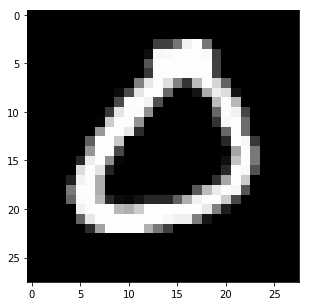

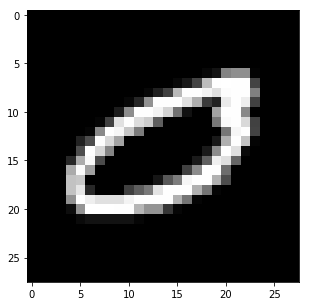

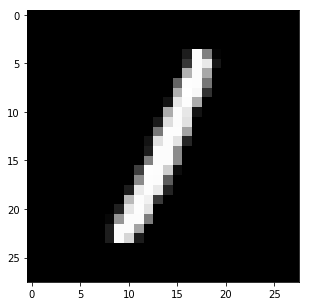

In [10]:
plt.rcParams['figure.figsize'] = [5, 5]
samples = [0,19,20]
ciz(imgs[samples[0]])
ciz(imgs[samples[1]])
ciz(imgs[samples[2]])


for i in range(len(samples)):
    wt= np.empty([28, 29], dtype=np.float)
    for j in range(28):
        linie = imgs[i][j]
        wt[j]=v.getWaveletCoefs(linie)


    

# Temmuz 2019 Ilerleme Sunumu icin

In [5]:
import numpy as np
from pywt import wavedec
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import  graphviz_layout
import networkx as nx
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = [15, 10]     


def genData(param, show = False):
	a=[]
	if param[0]=="normal":
		mu, sigma, s = param[1],   param[2], param[3]
		a= np.random.normal(mu, sigma, size=s)
	elif param[0]=='uniform':
		mi, ma,s=param[1],   param[2], param[3]
		a= np.random.uniform(mi, ma, s)
	elif param[0]=="poisson":
		rate,s=param[1],   param[2]
		a = np.random.poisson(rate, s)
	if(show):
		count, bins, ignored = plt.hist(s, 14, density=True)
	return a
def decodeTrainOperations(all,cikti=False):
    sonuc = ""
    for i in range(len(all)):
        print(i, end="\t")
        a = all[i]
        
        if(int(a[1])%4==0   ):
            print(int(a[0]) , "+", int(a[2]) ,"=", int(a[0])  + int(a[2]))
            if cikti:
                sonuc = str(a[0])+"+"+str(a[2])+"="+str( int(a[0])  + int(a[2]))
                return sonuc
       
        elif(int(a[1])%4==1  ):            
            print(int(a[0]) , "-", int(a[2]) ,"=", int(int(a[0])  - int(a[2])))            
        
        elif(int(a[1])%4==2   ):
            print(int(a[0]) , "*", int(a[2]) ,"=", int(a[0])  * int(a[2]))
                    
        elif(int(a[1])%4==3 ):            
            print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  / int(a[2])))
           
        
def getSamplePredef():
    print("return sample data")
    signals = [[105, 220, 23, 99, 266, 190, 37, 5],
                [334, 174, 134, -7, 19, 155, 93, 89],
                [72, 96, 102, 151, -14, 171, 127, 127],
                [15, 38, 283, 204, 232, 141, 121, 47],
                [157, -60, 54, 54, 69, -27, -14, 101],
                [0, 113, 74, 176, 68, 322, 135, 367],
                [56, 114, 126, 181, 93, 41, 118, 76],
                [164, 200, 351, 51, 36, 163, 298, -5],
                [140, 124, 99, 34, -46, -5, 240, 136],
                [113, 58, 130, 123, 171, 143, 109, 17],
                [-8, 299, 65, 62, 130, 146, -43, 23],
                [-96, 212, 56, 150, -55, 150, 151, 70],
                [-22, 148, 219, 62, 108, 136, 198, 126],
                [220, 84, 165, 167, 1, 227, 15, 144],
                [200, 135, 165, 64, 100, 224, 244, 140],
                [21, 183, -161, 65, 33, 257, -16, 112]]
    return signals

In [6]:
def generateOperationsSymbols(operations_count, symbol_list, Test = False, verbose= False):
    ops_ids=[]
    symbolSet = []
    
    for i in range(operations_count):
        if(verbose):print(i, end="\t")
        a = genData(["uniform", 0,10,4])    
        a= [int(x) for x in a]
        if(Test):
            a[3]=0
        go = True        
        #a=[4, 5, 9, -5]
        a[1]=a[1]%2
        a[1]=0
        rez = 0
        
        
        if(int(a[1])%4==0   ): # operation is + 
            if ( a[0] + a[2] > 9 ):
                go = False
            else :
                rez = a[0] + a[2]
        elif(int(a[1])%4==1   ): # operation is -
            if a[0] < a[2]  :
                go = False                
            else :
                #print("here", a[0] - a[2] , a[0] > a[2])
                rez = a[0] - a[2]
        elif(int(a[1])%4==2   ): # operation is *
            if ( a[0] * a[2] >9  ):
                go = False
            else :                
                rez = a[0] * a[2]               
        elif(int(a[1])%4==3   ): # operation is -
            if ( a[2] ==0 ):                
                go = False
            else :
                rez = int(a[0] / a[2])
        #rint(go)  
        
        if(a[0] > 5 or a[2]>5  or (a[0]==1 and a[2]==3) or (a[0]==2 and a[2]==3) ):
            go=False
        
        if go:
            if verbose : print(go , rez)
            a[3]=rez
            ops_ids.append(a)
            symbolSet.append(symbol_list[a[0]] )
            symbolSet.append(symbol_list[a[1]%4+10] )
            symbolSet.append(symbol_list[a[2]] )
            symbolSet.append(symbol_list[14] )
            if(not Test):
                symbolSet.append(symbol_list[a[3]] )
            else:
                symbolSet.append(symbol_list[15] )
    return ops_ids, symbolSet

In [7]:
a= getSamplePredef()
b=[]
for i in a:
    b.append([])
    for j in i:
        b[-1].append(int(j<100))

return sample data


In [8]:
for i in b:
    print(i)
c=np.array(b)

[0, 0, 1, 1, 0, 0, 1, 1]
[0, 0, 0, 1, 1, 0, 1, 1]
[1, 1, 0, 0, 1, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 1]
[0, 1, 1, 1, 1, 1, 1, 0]
[1, 0, 1, 0, 1, 0, 0, 0]
[1, 0, 0, 0, 1, 1, 0, 1]
[0, 0, 0, 1, 1, 0, 0, 1]
[0, 0, 1, 1, 1, 1, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 1]
[1, 0, 1, 1, 0, 0, 1, 1]
[1, 0, 1, 0, 1, 0, 0, 1]
[1, 0, 0, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 1, 0, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 0, 1, 0]


In [9]:

n_signals = len(a)
max_corr=np.zeros([n_signals,n_signals])
for first in range(n_signals):
    for second in range(first + 1, n_signals):
        #corr = np.correlate(c[first], c[second], mode='full')
        #max_corr[first, second] = np.max(corr)
        max_corr[first][second] = int(sum(abs((c[first]-c[second]))))
        max_corr[second] [first] = int(sum(abs((c[first]-c[second]))))

In [10]:
import matplotlib.pyplot as plt
print(max_corr)
#plt.imshow(max_corr)


[[0. 2. 7. 5. 4. 5. 6. 3. 4. 4. 1. 4. 4. 5. 3. 3.]
 [2. 0. 5. 5. 4. 5. 4. 1. 4. 4. 3. 4. 4. 3. 3. 3.]
 [7. 5. 0. 2. 5. 2. 3. 4. 5. 3. 6. 3. 3. 2. 4. 4.]
 [5. 5. 2. 0. 7. 4. 3. 4. 7. 1. 4. 3. 3. 4. 4. 6.]
 [4. 4. 5. 7. 0. 5. 6. 5. 2. 6. 5. 6. 6. 3. 5. 3.]
 [5. 5. 2. 4. 5. 0. 3. 4. 3. 5. 4. 1. 3. 4. 4. 2.]
 [6. 4. 3. 3. 6. 3. 0. 3. 4. 4. 5. 2. 4. 5. 5. 5.]
 [3. 1. 4. 4. 5. 4. 3. 0. 3. 3. 4. 3. 3. 4. 2. 4.]
 [4. 4. 5. 7. 2. 3. 4. 3. 0. 6. 5. 4. 4. 5. 3. 3.]
 [4. 4. 3. 1. 6. 5. 4. 3. 6. 0. 5. 4. 4. 3. 3. 7.]
 [1. 3. 6. 4. 5. 4. 5. 4. 5. 5. 0. 3. 3. 6. 4. 2.]
 [4. 4. 3. 3. 6. 1. 2. 3. 4. 4. 3. 0. 4. 5. 5. 3.]
 [4. 4. 3. 3. 6. 3. 4. 3. 4. 4. 3. 4. 0. 5. 1. 3.]
 [5. 3. 2. 4. 3. 4. 5. 4. 5. 3. 6. 5. 5. 0. 4. 4.]
 [3. 3. 4. 4. 5. 4. 5. 2. 3. 3. 4. 5. 1. 4. 0. 4.]
 [3. 3. 4. 6. 3. 2. 5. 4. 3. 7. 2. 3. 3. 4. 4. 0.]]


In [11]:
verbose = True
op_count = 2000
symbols = c
symbols_correspondence = ["0","1","2","3","4","5","6","7","8","9","+", "-","*", "/","=","?"]
if (verbose):
    print("symbols")
    [print(i, symbols_correspondence[i], symbols[i]) for i in range(len(symbols))]
    print()
    
a,b=generateOperationsSymbols(op_count, symbols, False, False)

if (verbose): 
    print("operations encoded ")
    [print(i, a[i]) for i in range(len(a))]
    print() 
    print("operations")
    decodeTrainOperations(a)
    print("operation symbols")
    [print(i, b[i]) for i in range(len(b))]
    print()


symbols
0 0 [0 0 1 1 0 0 1 1]
1 1 [0 0 0 1 1 0 1 1]
2 2 [1 1 0 0 1 0 0 0]
3 3 [1 1 0 0 0 0 0 1]
4 4 [0 1 1 1 1 1 1 0]
5 5 [1 0 1 0 1 0 0 0]
6 6 [1 0 0 0 1 1 0 1]
7 7 [0 0 0 1 1 0 0 1]
8 8 [0 0 1 1 1 1 0 0]
9 9 [0 1 0 0 0 0 0 1]
10 + [1 0 1 1 0 0 1 1]
11 - [1 0 1 0 1 0 0 1]
12 * [1 0 0 1 0 0 0 0]
13 / [0 1 0 0 1 0 1 0]
14 = [0 0 0 1 0 0 0 0]
15 ? [1 0 1 1 1 0 1 0]

operations encoded 
0 [2, 0, 4, 6]
1 [2, 0, 1, 3]
2 [2, 0, 1, 3]
3 [1, 0, 4, 5]
4 [4, 0, 5, 9]
5 [1, 0, 2, 3]
6 [5, 0, 2, 7]
7 [4, 0, 1, 5]
8 [0, 0, 4, 4]
9 [0, 0, 2, 2]
10 [4, 0, 1, 5]
11 [2, 0, 0, 2]
12 [2, 0, 4, 6]
13 [4, 0, 5, 9]
14 [0, 0, 3, 3]
15 [2, 0, 0, 2]
16 [0, 0, 1, 1]
17 [1, 0, 2, 3]
18 [5, 0, 4, 9]
19 [1, 0, 0, 1]
20 [3, 0, 5, 8]
21 [1, 0, 1, 2]
22 [2, 0, 5, 7]
23 [5, 0, 3, 8]
24 [0, 0, 1, 1]
25 [1, 0, 1, 2]
26 [1, 0, 0, 1]
27 [0, 0, 5, 5]
28 [3, 0, 0, 3]
29 [0, 0, 3, 3]
30 [1, 0, 0, 1]
31 [0, 0, 3, 3]
32 [2, 0, 5, 7]
33 [2, 0, 1, 3]
34 [2, 0, 2, 4]
35 [2, 0, 0, 2]
36 [4, 0, 3, 7]
37 [2, 0, 5, 7]
38 [3, 0, 4, 7]

1	2 + 1 = 3
2	2 + 1 = 3
3	1 + 4 = 5
4	4 + 5 = 9
5	1 + 2 = 3
6	5 + 2 = 7
7	4 + 1 = 5
8	0 + 4 = 4
9	0 + 2 = 2
10	4 + 1 = 5
11	2 + 0 = 2
12	2 + 4 = 6
13	4 + 5 = 9
14	0 + 3 = 3
15	2 + 0 = 2
16	0 + 1 = 1
17	1 + 2 = 3
18	5 + 4 = 9
19	1 + 0 = 1
20	3 + 5 = 8
21	1 + 1 = 2
22	2 + 5 = 7
23	5 + 3 = 8
24	0 + 1 = 1
25	1 + 1 = 2
26	1 + 0 = 1
27	0 + 5 = 5
28	3 + 0 = 3
29	0 + 3 = 3
30	1 + 0 = 1
31	0 + 3 = 3
32	2 + 5 = 7
33	2 + 1 = 3
34	2 + 2 = 4
35	2 + 0 = 2
36	4 + 3 = 7
37	2 + 5 = 7
38	3 + 4 = 7
39	2 + 2 = 4
40	0 + 1 = 1
41	2 + 4 = 6
42	2 + 4 = 6
43	0 + 3 = 3
44	0 + 4 = 4
45	1 + 1 = 2
46	4 + 1 = 5
47	0 + 1 = 1
48	2 + 2 = 4
49	0 + 1 = 1
50	0 + 2 = 2
51	3 + 0 = 3
52	5 + 3 = 8
53	2 + 1 = 3
54	0 + 1 = 1
55	2 + 2 = 4
56	3 + 0 = 3
57	0 + 5 = 5
58	0 + 4 = 4
59	0 + 3 = 3
60	4 + 1 = 5
61	2 + 2 = 4
62	3 + 0 = 3
63	3 + 4 = 7
64	4 + 1 = 5
65	0 + 0 = 0
66	3 + 1 = 4
67	5 + 2 = 7
68	1 + 5 = 6
69	3 + 3 = 6
70	4 + 5 = 9
71	4 + 3 = 7
72	4 + 5 = 9
73	2 + 1 = 3
74	2 + 1 = 3
75	0 + 0 = 0
76	4 + 1 = 5
77	0 + 4 = 4
78	3 + 1

157 [1 1 0 0 0 0 0 1]
158 [0 0 0 1 0 0 0 0]
159 [1 1 0 0 0 0 0 1]
160 [1 1 0 0 1 0 0 0]
161 [1 0 1 1 0 0 1 1]
162 [1 0 1 0 1 0 0 0]
163 [0 0 0 1 0 0 0 0]
164 [0 0 0 1 1 0 0 1]
165 [1 1 0 0 1 0 0 0]
166 [1 0 1 1 0 0 1 1]
167 [0 0 0 1 1 0 1 1]
168 [0 0 0 1 0 0 0 0]
169 [1 1 0 0 0 0 0 1]
170 [1 1 0 0 1 0 0 0]
171 [1 0 1 1 0 0 1 1]
172 [1 1 0 0 1 0 0 0]
173 [0 0 0 1 0 0 0 0]
174 [0 1 1 1 1 1 1 0]
175 [1 1 0 0 1 0 0 0]
176 [1 0 1 1 0 0 1 1]
177 [0 0 1 1 0 0 1 1]
178 [0 0 0 1 0 0 0 0]
179 [1 1 0 0 1 0 0 0]
180 [0 1 1 1 1 1 1 0]
181 [1 0 1 1 0 0 1 1]
182 [1 1 0 0 0 0 0 1]
183 [0 0 0 1 0 0 0 0]
184 [0 0 0 1 1 0 0 1]
185 [1 1 0 0 1 0 0 0]
186 [1 0 1 1 0 0 1 1]
187 [1 0 1 0 1 0 0 0]
188 [0 0 0 1 0 0 0 0]
189 [0 0 0 1 1 0 0 1]
190 [1 1 0 0 0 0 0 1]
191 [1 0 1 1 0 0 1 1]
192 [0 1 1 1 1 1 1 0]
193 [0 0 0 1 0 0 0 0]
194 [0 0 0 1 1 0 0 1]
195 [1 1 0 0 1 0 0 0]
196 [1 0 1 1 0 0 1 1]
197 [1 1 0 0 1 0 0 0]
198 [0 0 0 1 0 0 0 0]
199 [0 1 1 1 1 1 1 0]
200 [0 0 1 1 0 0 1 1]
201 [1 0 1 1 0 0 1 1]
202 [0 0 0

726 [1 0 1 1 0 0 1 1]
727 [0 1 1 1 1 1 1 0]
728 [0 0 0 1 0 0 0 0]
729 [0 0 0 1 1 0 0 1]
730 [1 1 0 0 0 0 0 1]
731 [1 0 1 1 0 0 1 1]
732 [1 0 1 0 1 0 0 0]
733 [0 0 0 1 0 0 0 0]
734 [0 0 1 1 1 1 0 0]
735 [0 0 1 1 0 0 1 1]
736 [1 0 1 1 0 0 1 1]
737 [0 1 1 1 1 1 1 0]
738 [0 0 0 1 0 0 0 0]
739 [0 1 1 1 1 1 1 0]
740 [1 1 0 0 0 0 0 1]
741 [1 0 1 1 0 0 1 1]
742 [0 0 0 1 1 0 1 1]
743 [0 0 0 1 0 0 0 0]
744 [0 1 1 1 1 1 1 0]
745 [0 0 0 1 1 0 1 1]
746 [1 0 1 1 0 0 1 1]
747 [1 0 1 0 1 0 0 0]
748 [0 0 0 1 0 0 0 0]
749 [1 0 0 0 1 1 0 1]
750 [1 1 0 0 0 0 0 1]
751 [1 0 1 1 0 0 1 1]
752 [1 0 1 0 1 0 0 0]
753 [0 0 0 1 0 0 0 0]
754 [0 0 1 1 1 1 0 0]
755 [1 0 1 0 1 0 0 0]
756 [1 0 1 1 0 0 1 1]
757 [1 1 0 0 0 0 0 1]
758 [0 0 0 1 0 0 0 0]
759 [0 0 1 1 1 1 0 0]
760 [0 0 0 1 1 0 1 1]
761 [1 0 1 1 0 0 1 1]
762 [1 0 1 0 1 0 0 0]
763 [0 0 0 1 0 0 0 0]
764 [1 0 0 0 1 1 0 1]
765 [0 1 1 1 1 1 1 0]
766 [1 0 1 1 0 0 1 1]
767 [0 0 0 1 1 0 1 1]
768 [0 0 0 1 0 0 0 0]
769 [1 0 1 0 1 0 0 0]
770 [0 0 0 1 1 0 1 1]
771 [1 0 1

1189 [1 1 0 0 1 0 0 0]
1190 [0 0 1 1 0 0 1 1]
1191 [1 0 1 1 0 0 1 1]
1192 [1 1 0 0 1 0 0 0]
1193 [0 0 0 1 0 0 0 0]
1194 [1 1 0 0 1 0 0 0]
1195 [0 1 1 1 1 1 1 0]
1196 [1 0 1 1 0 0 1 1]
1197 [1 0 1 0 1 0 0 0]
1198 [0 0 0 1 0 0 0 0]
1199 [0 1 0 0 0 0 0 1]
1200 [1 1 0 0 0 0 0 1]
1201 [1 0 1 1 0 0 1 1]
1202 [1 1 0 0 0 0 0 1]
1203 [0 0 0 1 0 0 0 0]
1204 [1 0 0 0 1 1 0 1]
1205 [0 1 1 1 1 1 1 0]
1206 [1 0 1 1 0 0 1 1]
1207 [1 1 0 0 1 0 0 0]
1208 [0 0 0 1 0 0 0 0]
1209 [1 0 0 0 1 1 0 1]
1210 [1 1 0 0 1 0 0 0]
1211 [1 0 1 1 0 0 1 1]
1212 [1 0 1 0 1 0 0 0]
1213 [0 0 0 1 0 0 0 0]
1214 [0 0 0 1 1 0 0 1]
1215 [1 1 0 0 0 0 0 1]
1216 [1 0 1 1 0 0 1 1]
1217 [0 0 1 1 0 0 1 1]
1218 [0 0 0 1 0 0 0 0]
1219 [1 1 0 0 0 0 0 1]
1220 [1 0 1 0 1 0 0 0]
1221 [1 0 1 1 0 0 1 1]
1222 [1 1 0 0 0 0 0 1]
1223 [0 0 0 1 0 0 0 0]
1224 [0 0 1 1 1 1 0 0]
1225 [1 0 1 0 1 0 0 0]
1226 [1 0 1 1 0 0 1 1]
1227 [0 0 0 1 1 0 1 1]
1228 [0 0 0 1 0 0 0 0]
1229 [1 0 0 0 1 1 0 1]
1230 [1 1 0 0 0 0 0 1]
1231 [1 0 1 1 0 0 1 1]
1232 [1 1 0

1604 [1 0 1 0 1 0 0 0]
1605 [1 1 0 0 0 0 0 1]
1606 [1 0 1 1 0 0 1 1]
1607 [1 0 1 0 1 0 0 0]
1608 [0 0 0 1 0 0 0 0]
1609 [0 0 1 1 1 1 0 0]
1610 [0 0 1 1 0 0 1 1]
1611 [1 0 1 1 0 0 1 1]
1612 [0 0 1 1 0 0 1 1]
1613 [0 0 0 1 0 0 0 0]
1614 [0 0 1 1 0 0 1 1]
1615 [0 1 1 1 1 1 1 0]
1616 [1 0 1 1 0 0 1 1]
1617 [0 0 0 1 1 0 1 1]
1618 [0 0 0 1 0 0 0 0]
1619 [1 0 1 0 1 0 0 0]
1620 [1 1 0 0 0 0 0 1]
1621 [1 0 1 1 0 0 1 1]
1622 [0 0 0 1 1 0 1 1]
1623 [0 0 0 1 0 0 0 0]
1624 [0 1 1 1 1 1 1 0]
1625 [1 1 0 0 1 0 0 0]
1626 [1 0 1 1 0 0 1 1]
1627 [0 0 0 1 1 0 1 1]
1628 [0 0 0 1 0 0 0 0]
1629 [1 1 0 0 0 0 0 1]
1630 [0 1 1 1 1 1 1 0]
1631 [1 0 1 1 0 0 1 1]
1632 [1 0 1 0 1 0 0 0]
1633 [0 0 0 1 0 0 0 0]
1634 [0 1 0 0 0 0 0 1]
1635 [0 0 1 1 0 0 1 1]
1636 [1 0 1 1 0 0 1 1]
1637 [0 0 1 1 0 0 1 1]
1638 [0 0 0 1 0 0 0 0]
1639 [0 0 1 1 0 0 1 1]
1640 [1 1 0 0 1 0 0 0]
1641 [1 0 1 1 0 0 1 1]
1642 [0 0 0 1 1 0 1 1]
1643 [0 0 0 1 0 0 0 0]
1644 [1 1 0 0 0 0 0 1]
1645 [1 0 1 0 1 0 0 0]
1646 [1 0 1 1 0 0 1 1]
1647 [0 0 1

1997 [1 0 1 0 1 0 0 0]
1998 [0 0 0 1 0 0 0 0]
1999 [0 0 1 1 1 1 0 0]
2000 [1 1 0 0 0 0 0 1]
2001 [1 0 1 1 0 0 1 1]
2002 [1 0 1 0 1 0 0 0]
2003 [0 0 0 1 0 0 0 0]
2004 [0 0 1 1 1 1 0 0]
2005 [1 0 1 0 1 0 0 0]
2006 [1 0 1 1 0 0 1 1]
2007 [0 1 1 1 1 1 1 0]
2008 [0 0 0 1 0 0 0 0]
2009 [0 1 0 0 0 0 0 1]
2010 [1 1 0 0 1 0 0 0]
2011 [1 0 1 1 0 0 1 1]
2012 [0 1 1 1 1 1 1 0]
2013 [0 0 0 1 0 0 0 0]
2014 [1 0 0 0 1 1 0 1]
2015 [0 0 0 1 1 0 1 1]
2016 [1 0 1 1 0 0 1 1]
2017 [0 0 1 1 0 0 1 1]
2018 [0 0 0 1 0 0 0 0]
2019 [0 0 0 1 1 0 1 1]
2020 [1 1 0 0 0 0 0 1]
2021 [1 0 1 1 0 0 1 1]
2022 [1 1 0 0 0 0 0 1]
2023 [0 0 0 1 0 0 0 0]
2024 [1 0 0 0 1 1 0 1]
2025 [1 0 1 0 1 0 0 0]
2026 [1 0 1 1 0 0 1 1]
2027 [1 1 0 0 1 0 0 0]
2028 [0 0 0 1 0 0 0 0]
2029 [0 0 0 1 1 0 0 1]
2030 [1 1 0 0 1 0 0 0]
2031 [1 0 1 1 0 0 1 1]
2032 [0 0 1 1 0 0 1 1]
2033 [0 0 0 1 0 0 0 0]
2034 [1 1 0 0 1 0 0 0]
2035 [0 0 1 1 0 0 1 1]
2036 [1 0 1 1 0 0 1 1]
2037 [0 0 1 1 0 0 1 1]
2038 [0 0 0 1 0 0 0 0]
2039 [0 0 1 1 0 0 1 1]
2040 [1 1 0

2385 [0 0 0 1 1 0 1 1]
2386 [1 0 1 1 0 0 1 1]
2387 [0 0 0 1 1 0 1 1]
2388 [0 0 0 1 0 0 0 0]
2389 [1 1 0 0 1 0 0 0]
2390 [1 1 0 0 1 0 0 0]
2391 [1 0 1 1 0 0 1 1]
2392 [0 0 1 1 0 0 1 1]
2393 [0 0 0 1 0 0 0 0]
2394 [1 1 0 0 1 0 0 0]
2395 [1 1 0 0 1 0 0 0]
2396 [1 0 1 1 0 0 1 1]
2397 [0 0 1 1 0 0 1 1]
2398 [0 0 0 1 0 0 0 0]
2399 [1 1 0 0 1 0 0 0]
2400 [0 0 0 1 1 0 1 1]
2401 [1 0 1 1 0 0 1 1]
2402 [0 0 1 1 0 0 1 1]
2403 [0 0 0 1 0 0 0 0]
2404 [0 0 0 1 1 0 1 1]
2405 [0 0 1 1 0 0 1 1]
2406 [1 0 1 1 0 0 1 1]
2407 [0 0 0 1 1 0 1 1]
2408 [0 0 0 1 0 0 0 0]
2409 [0 0 0 1 1 0 1 1]
2410 [0 0 0 1 1 0 1 1]
2411 [1 0 1 1 0 0 1 1]
2412 [0 0 1 1 0 0 1 1]
2413 [0 0 0 1 0 0 0 0]
2414 [0 0 0 1 1 0 1 1]
2415 [1 1 0 0 0 0 0 1]
2416 [1 0 1 1 0 0 1 1]
2417 [1 0 1 0 1 0 0 0]
2418 [0 0 0 1 0 0 0 0]
2419 [0 0 1 1 1 1 0 0]
2420 [0 1 1 1 1 1 1 0]
2421 [1 0 1 1 0 0 1 1]
2422 [0 0 1 1 0 0 1 1]
2423 [0 0 0 1 0 0 0 0]
2424 [0 1 1 1 1 1 1 0]
2425 [0 0 1 1 0 0 1 1]
2426 [1 0 1 1 0 0 1 1]
2427 [0 0 1 1 0 0 1 1]
2428 [0 0 0

2790 [0 0 1 1 0 0 1 1]
2791 [1 0 1 1 0 0 1 1]
2792 [0 1 1 1 1 1 1 0]
2793 [0 0 0 1 0 0 0 0]
2794 [0 1 1 1 1 1 1 0]
2795 [0 0 0 1 1 0 1 1]
2796 [1 0 1 1 0 0 1 1]
2797 [0 1 1 1 1 1 1 0]
2798 [0 0 0 1 0 0 0 0]
2799 [1 0 1 0 1 0 0 0]
2800 [1 1 0 0 1 0 0 0]
2801 [1 0 1 1 0 0 1 1]
2802 [1 1 0 0 1 0 0 0]
2803 [0 0 0 1 0 0 0 0]
2804 [0 1 1 1 1 1 1 0]
2805 [1 0 1 0 1 0 0 0]
2806 [1 0 1 1 0 0 1 1]
2807 [0 1 1 1 1 1 1 0]
2808 [0 0 0 1 0 0 0 0]
2809 [0 1 0 0 0 0 0 1]
2810 [1 1 0 0 0 0 0 1]
2811 [1 0 1 1 0 0 1 1]
2812 [0 0 1 1 0 0 1 1]
2813 [0 0 0 1 0 0 0 0]
2814 [1 1 0 0 0 0 0 1]
2815 [0 0 1 1 0 0 1 1]
2816 [1 0 1 1 0 0 1 1]
2817 [0 1 1 1 1 1 1 0]
2818 [0 0 0 1 0 0 0 0]
2819 [0 1 1 1 1 1 1 0]
2820 [1 1 0 0 0 0 0 1]
2821 [1 0 1 1 0 0 1 1]
2822 [1 1 0 0 0 0 0 1]
2823 [0 0 0 1 0 0 0 0]
2824 [1 0 0 0 1 1 0 1]
2825 [1 1 0 0 0 0 0 1]
2826 [1 0 1 1 0 0 1 1]
2827 [1 1 0 0 1 0 0 0]
2828 [0 0 0 1 0 0 0 0]
2829 [1 0 1 0 1 0 0 0]
2830 [0 0 1 1 0 0 1 1]
2831 [1 0 1 1 0 0 1 1]
2832 [1 1 0 0 0 0 0 1]
2833 [0 0 0

3155 [0 0 0 1 1 0 1 1]
3156 [1 0 1 1 0 0 1 1]
3157 [0 0 0 1 1 0 1 1]
3158 [0 0 0 1 0 0 0 0]
3159 [1 1 0 0 1 0 0 0]
3160 [1 0 1 0 1 0 0 0]
3161 [1 0 1 1 0 0 1 1]
3162 [0 0 0 1 1 0 1 1]
3163 [0 0 0 1 0 0 0 0]
3164 [1 0 0 0 1 1 0 1]
3165 [0 1 1 1 1 1 1 0]
3166 [1 0 1 1 0 0 1 1]
3167 [1 1 0 0 0 0 0 1]
3168 [0 0 0 1 0 0 0 0]
3169 [0 0 0 1 1 0 0 1]
3170 [1 0 1 0 1 0 0 0]
3171 [1 0 1 1 0 0 1 1]
3172 [1 1 0 0 1 0 0 0]
3173 [0 0 0 1 0 0 0 0]
3174 [0 0 0 1 1 0 0 1]
3175 [1 0 1 0 1 0 0 0]
3176 [1 0 1 1 0 0 1 1]
3177 [0 0 0 1 1 0 1 1]
3178 [0 0 0 1 0 0 0 0]
3179 [1 0 0 0 1 1 0 1]
3180 [1 1 0 0 0 0 0 1]
3181 [1 0 1 1 0 0 1 1]
3182 [0 0 1 1 0 0 1 1]
3183 [0 0 0 1 0 0 0 0]
3184 [1 1 0 0 0 0 0 1]
3185 [0 1 1 1 1 1 1 0]
3186 [1 0 1 1 0 0 1 1]
3187 [1 1 0 0 1 0 0 0]
3188 [0 0 0 1 0 0 0 0]
3189 [1 0 0 0 1 1 0 1]
3190 [1 0 1 0 1 0 0 0]
3191 [1 0 1 1 0 0 1 1]
3192 [1 1 0 0 0 0 0 1]
3193 [0 0 0 1 0 0 0 0]
3194 [0 0 1 1 1 1 0 0]
3195 [1 0 1 0 1 0 0 0]
3196 [1 0 1 1 0 0 1 1]
3197 [1 1 0 0 0 0 0 1]
3198 [0 0 0

In [12]:



print(a)
print()
for i in range(len(b)):
    print (   b[i])

[[2, 0, 4, 6], [2, 0, 1, 3], [2, 0, 1, 3], [1, 0, 4, 5], [4, 0, 5, 9], [1, 0, 2, 3], [5, 0, 2, 7], [4, 0, 1, 5], [0, 0, 4, 4], [0, 0, 2, 2], [4, 0, 1, 5], [2, 0, 0, 2], [2, 0, 4, 6], [4, 0, 5, 9], [0, 0, 3, 3], [2, 0, 0, 2], [0, 0, 1, 1], [1, 0, 2, 3], [5, 0, 4, 9], [1, 0, 0, 1], [3, 0, 5, 8], [1, 0, 1, 2], [2, 0, 5, 7], [5, 0, 3, 8], [0, 0, 1, 1], [1, 0, 1, 2], [1, 0, 0, 1], [0, 0, 5, 5], [3, 0, 0, 3], [0, 0, 3, 3], [1, 0, 0, 1], [0, 0, 3, 3], [2, 0, 5, 7], [2, 0, 1, 3], [2, 0, 2, 4], [2, 0, 0, 2], [4, 0, 3, 7], [2, 0, 5, 7], [3, 0, 4, 7], [2, 0, 2, 4], [0, 0, 1, 1], [2, 0, 4, 6], [2, 0, 4, 6], [0, 0, 3, 3], [0, 0, 4, 4], [1, 0, 1, 2], [4, 0, 1, 5], [0, 0, 1, 1], [2, 0, 2, 4], [0, 0, 1, 1], [0, 0, 2, 2], [3, 0, 0, 3], [5, 0, 3, 8], [2, 0, 1, 3], [0, 0, 1, 1], [2, 0, 2, 4], [3, 0, 0, 3], [0, 0, 5, 5], [0, 0, 4, 4], [0, 0, 3, 3], [4, 0, 1, 5], [2, 0, 2, 4], [3, 0, 0, 3], [3, 0, 4, 7], [4, 0, 1, 5], [0, 0, 0, 0], [3, 0, 1, 4], [5, 0, 2, 7], [1, 0, 5, 6], [3, 0, 3, 6], [4, 0, 5, 9], [4, 0

[1 0 1 1 0 0 1 1]
[0 0 0 1 1 0 1 1]
[0 0 0 1 0 0 0 0]
[1 1 0 0 0 0 0 1]
[1 1 0 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[1 1 0 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[0 1 1 1 1 1 1 0]
[1 1 0 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[0 0 1 1 0 0 1 1]
[0 0 0 1 0 0 0 0]
[1 1 0 0 1 0 0 0]
[0 1 1 1 1 1 1 0]
[1 0 1 1 0 0 1 1]
[1 1 0 0 0 0 0 1]
[0 0 0 1 0 0 0 0]
[0 0 0 1 1 0 0 1]
[1 1 0 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[1 0 1 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 0 1 1 0 0 1]
[1 1 0 0 0 0 0 1]
[1 0 1 1 0 0 1 1]
[0 1 1 1 1 1 1 0]
[0 0 0 1 0 0 0 0]
[0 0 0 1 1 0 0 1]
[1 1 0 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[1 1 0 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[0 1 1 1 1 1 1 0]
[0 0 1 1 0 0 1 1]
[1 0 1 1 0 0 1 1]
[0 0 0 1 1 0 1 1]
[0 0 0 1 0 0 0 0]
[0 0 0 1 1 0 1 1]
[1 1 0 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[0 1 1 1 1 1 1 0]
[0 0 0 1 0 0 0 0]
[1 0 0 0 1 1 0 1]
[1 1 0 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[0 1 1 1 1 1 1 0]
[0 0 0 1 0 0 0 0]
[1 0 0 0 1 1 0 1]
[0 0 1 1 0 0 1 1]
[1 0 1 1 0 0 1 1]
[1 1 0 0 0 0 0 1]
[0 0 0 1 0 0 0 0]
[1 1 0 0 0 0 0 1]
[0 0 1 1 0 0 1 1]
[1 0 1 1 0

[0 0 0 1 0 0 0 0]
[0 1 1 1 1 1 1 0]
[1 0 1 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[0 0 0 1 1 0 1 1]
[0 0 0 1 0 0 0 0]
[1 0 0 0 1 1 0 1]
[1 0 1 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[1 1 0 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 0 1 1 0 0 1]
[0 0 1 1 0 0 1 1]
[1 0 1 1 0 0 1 1]
[1 1 0 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[1 1 0 0 1 0 0 0]
[1 1 0 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[0 0 0 1 1 0 1 1]
[0 0 0 1 0 0 0 0]
[1 1 0 0 0 0 0 1]
[1 1 0 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[0 0 0 1 1 0 1 1]
[0 0 0 1 0 0 0 0]
[1 1 0 0 0 0 0 1]
[1 0 1 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[1 1 0 0 0 0 0 1]
[0 0 0 1 0 0 0 0]
[0 0 1 1 1 1 0 0]
[1 1 0 0 0 0 0 1]
[1 0 1 1 0 0 1 1]
[1 0 1 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 1 1 1 1 0 0]
[0 0 1 1 0 0 1 1]
[1 0 1 1 0 0 1 1]
[1 1 0 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[1 1 0 0 1 0 0 0]
[1 1 0 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[1 0 1 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 0 1 1 0 0 1]
[1 1 0 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[1 1 0 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[0 1 1 1 1 1 1 0]
[1 1 0 0 0 0 0 1]
[1 0 1 1 0 0 1 1]
[0 1 1 1 1 1 1 0]
[0 0 0 1 0

[1 1 0 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[1 0 1 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 0 1 1 0 0 1]
[1 1 0 0 0 0 0 1]
[1 0 1 1 0 0 1 1]
[0 0 1 1 0 0 1 1]
[0 0 0 1 0 0 0 0]
[1 1 0 0 0 0 0 1]
[1 0 1 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[1 1 0 0 0 0 0 1]
[0 0 0 1 0 0 0 0]
[0 0 1 1 1 1 0 0]
[1 0 1 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[0 0 0 1 1 0 1 1]
[0 0 0 1 0 0 0 0]
[1 0 0 0 1 1 0 1]
[1 1 0 0 0 0 0 1]
[1 0 1 1 0 0 1 1]
[1 1 0 0 0 0 0 1]
[0 0 0 1 0 0 0 0]
[1 0 0 0 1 1 0 1]
[0 1 1 1 1 1 1 0]
[1 0 1 1 0 0 1 1]
[0 1 1 1 1 1 1 0]
[0 0 0 1 0 0 0 0]
[0 0 1 1 1 1 0 0]
[0 0 0 1 1 0 1 1]
[1 0 1 1 0 0 1 1]
[1 0 1 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[1 0 0 0 1 1 0 1]
[1 1 0 0 0 0 0 1]
[1 0 1 1 0 0 1 1]
[1 1 0 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[1 0 1 0 1 0 0 0]
[0 1 1 1 1 1 1 0]
[1 0 1 1 0 0 1 1]
[1 1 0 0 0 0 0 1]
[0 0 0 1 0 0 0 0]
[0 0 0 1 1 0 0 1]
[1 1 0 0 0 0 0 1]
[1 0 1 1 0 0 1 1]
[1 0 1 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 1 1 1 1 0 0]
[0 1 1 1 1 1 1 0]
[1 0 1 1 0 0 1 1]
[0 0 1 1 0 0 1 1]
[0 0 0 1 0 0 0 0]
[0 1 1 1 1 1 1 0]
[0 1 1 1 1

[0 0 1 1 0 0 1 1]
[0 0 0 1 0 0 0 0]
[1 1 0 0 1 0 0 0]
[0 0 0 1 1 0 1 1]
[1 0 1 1 0 0 1 1]
[1 1 0 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[1 1 0 0 0 0 0 1]
[0 0 0 1 1 0 1 1]
[1 0 1 1 0 0 1 1]
[0 0 1 1 0 0 1 1]
[0 0 0 1 0 0 0 0]
[0 0 0 1 1 0 1 1]
[0 0 0 1 1 0 1 1]
[1 0 1 1 0 0 1 1]
[0 0 1 1 0 0 1 1]
[0 0 0 1 0 0 0 0]
[0 0 0 1 1 0 1 1]
[1 1 0 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[0 0 1 1 0 0 1 1]
[0 0 0 1 0 0 0 0]
[1 1 0 0 1 0 0 0]
[0 1 1 1 1 1 1 0]
[1 0 1 1 0 0 1 1]
[1 1 0 0 0 0 0 1]
[0 0 0 1 0 0 0 0]
[0 0 0 1 1 0 0 1]
[1 0 1 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[0 0 0 1 1 0 1 1]
[0 0 0 1 0 0 0 0]
[1 0 0 0 1 1 0 1]
[0 1 1 1 1 1 1 0]
[1 0 1 1 0 0 1 1]
[0 0 1 1 0 0 1 1]
[0 0 0 1 0 0 0 0]
[0 1 1 1 1 1 1 0]
[0 1 1 1 1 1 1 0]
[1 0 1 1 0 0 1 1]
[0 1 1 1 1 1 1 0]
[0 0 0 1 0 0 0 0]
[0 0 1 1 1 1 0 0]
[1 1 0 0 0 0 0 1]
[1 0 1 1 0 0 1 1]
[0 0 0 1 1 0 1 1]
[0 0 0 1 0 0 0 0]
[0 1 1 1 1 1 1 0]
[0 1 1 1 1 1 1 0]
[1 0 1 1 0 0 1 1]
[0 0 1 1 0 0 1 1]
[0 0 0 1 0 0 0 0]
[0 1 1 1 1 1 1 0]
[1 1 0 0 0 0 0 1]
[1 0 1 1 0 0 1 1]
[1 1 0 0 1

[0 1 1 1 1 1 1 0]
[1 0 1 1 0 0 1 1]
[0 0 0 1 1 0 1 1]
[0 0 0 1 0 0 0 0]
[1 0 1 0 1 0 0 0]
[0 0 1 1 0 0 1 1]
[1 0 1 1 0 0 1 1]
[0 1 1 1 1 1 1 0]
[0 0 0 1 0 0 0 0]
[0 1 1 1 1 1 1 0]
[0 0 0 1 1 0 1 1]
[1 0 1 1 0 0 1 1]
[0 1 1 1 1 1 1 0]
[0 0 0 1 0 0 0 0]
[1 0 1 0 1 0 0 0]
[0 0 1 1 0 0 1 1]
[1 0 1 1 0 0 1 1]
[1 1 0 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[1 1 0 0 1 0 0 0]
[1 1 0 0 0 0 0 1]
[1 0 1 1 0 0 1 1]
[1 1 0 0 0 0 0 1]
[0 0 0 1 0 0 0 0]
[1 0 0 0 1 1 0 1]
[0 0 0 1 1 0 1 1]
[1 0 1 1 0 0 1 1]
[0 0 1 1 0 0 1 1]
[0 0 0 1 0 0 0 0]
[0 0 0 1 1 0 1 1]
[1 0 1 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[1 1 0 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 0 1 1 0 0 1]
[1 1 0 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[1 1 0 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[0 1 1 1 1 1 1 0]
[0 0 1 1 0 0 1 1]
[1 0 1 1 0 0 1 1]
[1 1 0 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[1 1 0 0 1 0 0 0]
[0 0 1 1 0 0 1 1]
[1 0 1 1 0 0 1 1]
[0 1 1 1 1 1 1 0]
[0 0 0 1 0 0 0 0]
[0 1 1 1 1 1 1 0]
[1 1 0 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[1 1 0 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[0 1 1 1 1 1 1 0]
[1 0 1 0 1

[1 1 0 0 0 0 0 1]
[0 0 1 1 0 0 1 1]
[1 0 1 1 0 0 1 1]
[0 1 1 1 1 1 1 0]
[0 0 0 1 0 0 0 0]
[0 1 1 1 1 1 1 0]
[1 1 0 0 0 0 0 1]
[1 0 1 1 0 0 1 1]
[0 0 1 1 0 0 1 1]
[0 0 0 1 0 0 0 0]
[1 1 0 0 0 0 0 1]
[0 0 1 1 0 0 1 1]
[1 0 1 1 0 0 1 1]
[0 0 1 1 0 0 1 1]
[0 0 0 1 0 0 0 0]
[0 0 1 1 0 0 1 1]
[1 0 1 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[0 0 0 1 1 0 1 1]
[0 0 0 1 0 0 0 0]
[1 0 0 0 1 1 0 1]
[1 1 0 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[1 0 1 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 0 1 1 0 0 1]
[1 1 0 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[1 0 1 0 1 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 0 1 1 0 0 1]
[0 0 1 1 0 0 1 1]
[1 0 1 1 0 0 1 1]
[1 1 0 0 0 0 0 1]
[0 0 0 1 0 0 0 0]
[1 1 0 0 0 0 0 1]
[1 0 1 0 1 0 0 0]
[1 0 1 1 0 0 1 1]
[0 0 0 1 1 0 1 1]
[0 0 0 1 0 0 0 0]
[1 0 0 0 1 1 0 1]
[1 1 0 0 0 0 0 1]
[1 0 1 1 0 0 1 1]
[1 1 0 0 0 0 0 1]
[0 0 0 1 0 0 0 0]
[1 0 0 0 1 1 0 1]
[0 0 0 1 1 0 1 1]
[1 0 1 1 0 0 1 1]
[0 1 1 1 1 1 1 0]
[0 0 0 1 0 0 0 0]
[1 0 1 0 1 0 0 0]
[1 1 0 0 0 0 0 1]
[1 0 1 1 0 0 1 1]
[0 1 1 1 1 1 1 0]
[0 0 0 1 0 0 0 0]
[0 0 0 1 1

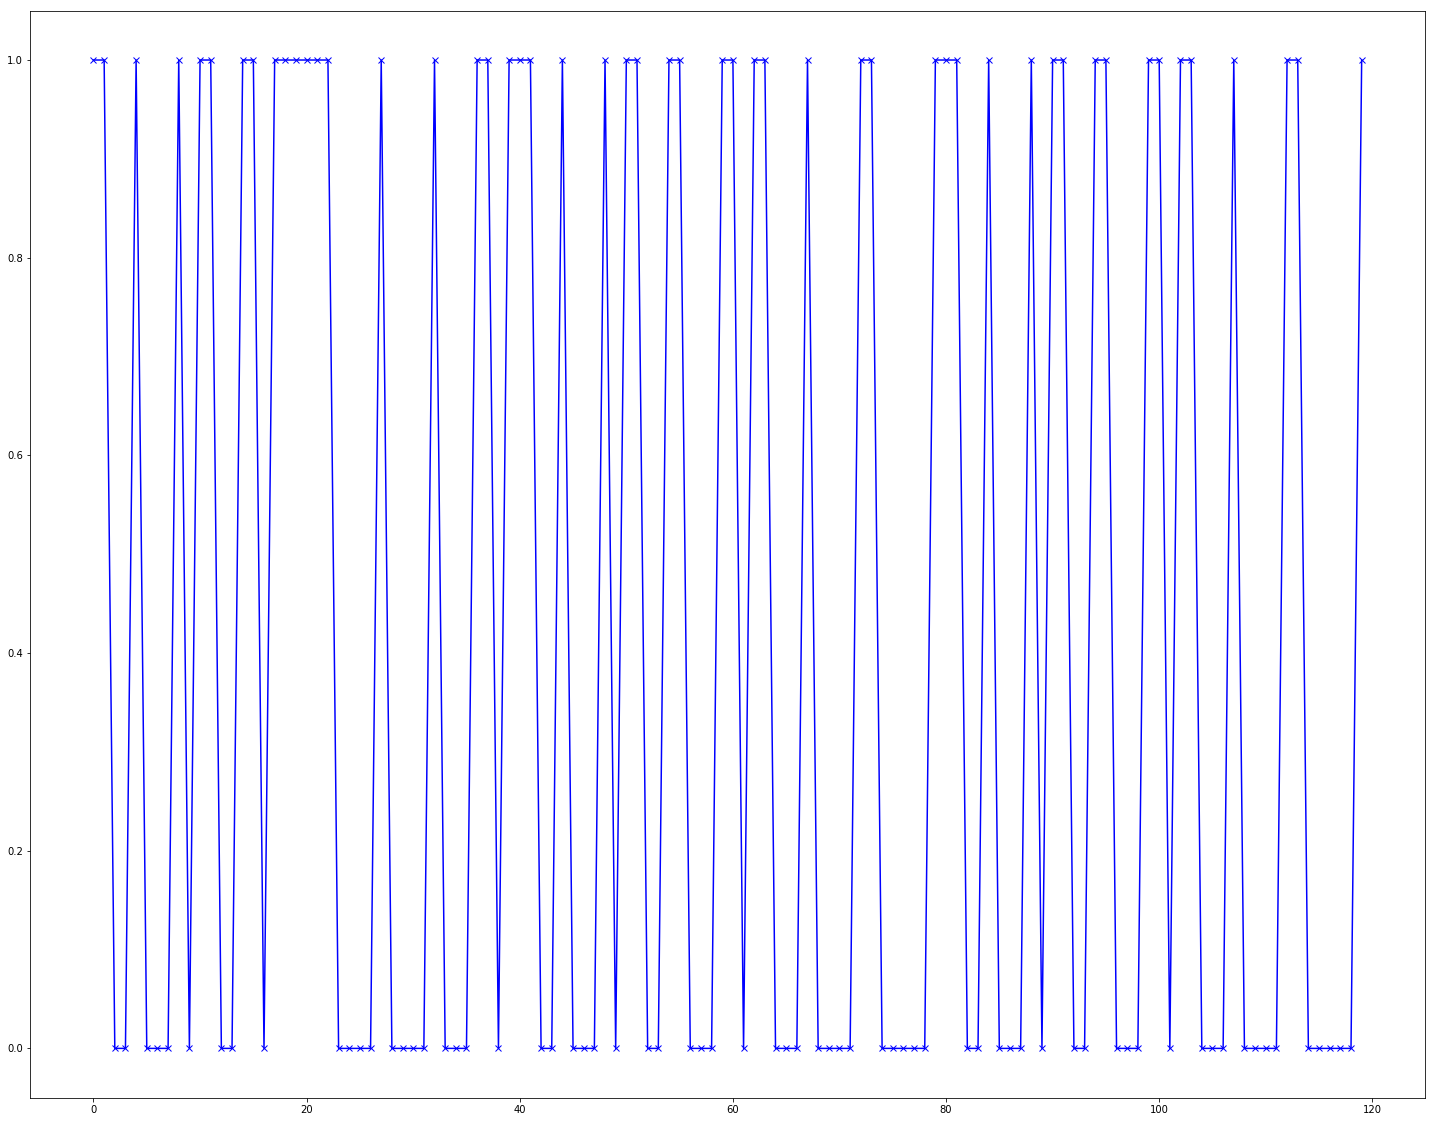

In [21]:
plt.rcParams['figure.figsize'] = [25, 20]     
plt.plot(np.concatenate(b)[:120],'b-x')

In [22]:
print(np.concatenate(b)[:40])

[0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1]


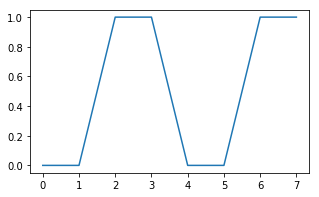

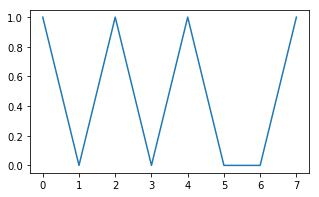

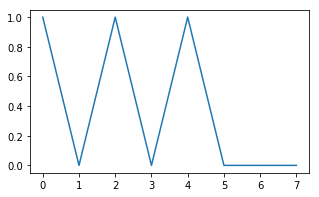

In [26]:
plt.rcParams['figure.figsize'] = [5, 3]     
plt.plot(symbols[0])
plt.show()
plt.plot(symbols[11])
plt.show()
plt.plot(symbols[5])
plt.show()
#plt.legend(["0","1","2"])

# Input Data

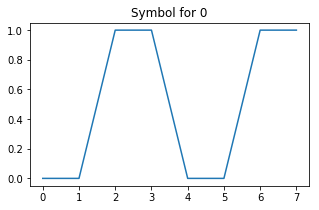

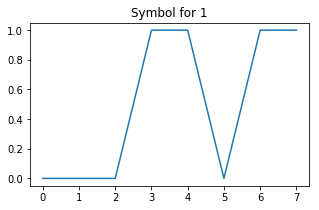

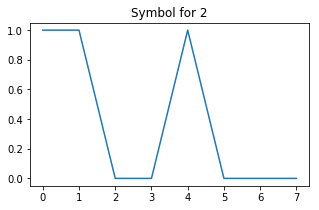

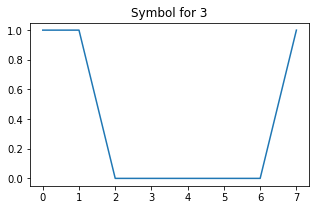

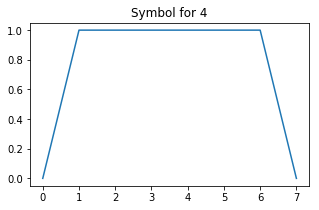

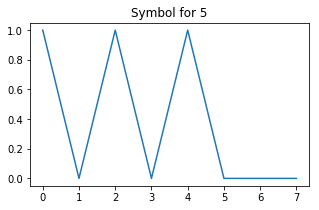

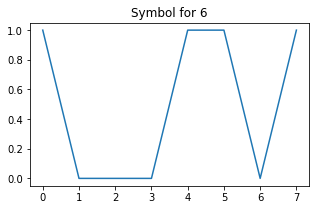

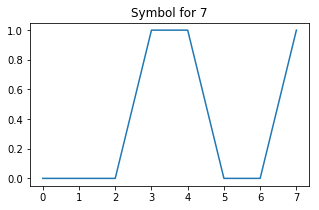

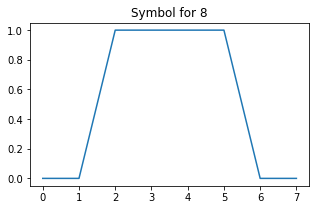

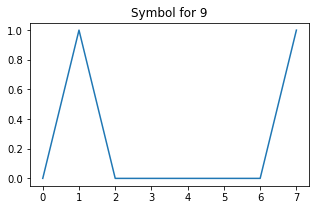

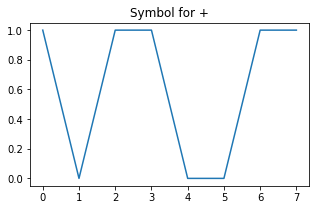

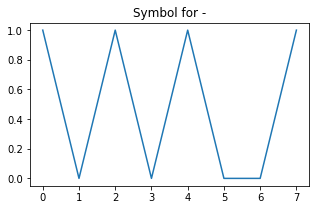

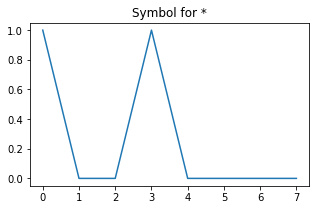

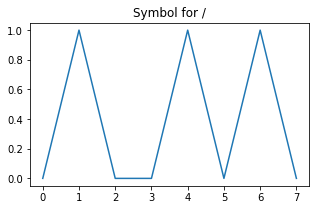

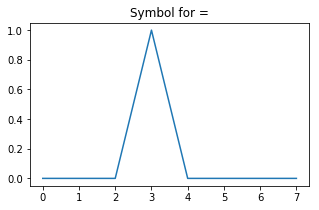

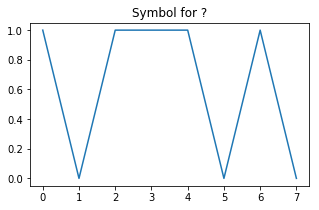

0	4 + 3 = 7


Text(0.5,1,'Sample Opperation4+3=7')

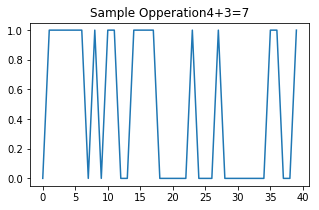

In [27]:
plt.rcParams['figure.figsize'] = [5, 3]     
for i in range(16):
    plt.plot(symbols[i])
    plt.title("Symbol for " + symbols_correspondence[i])
    plt.show()

[(i, a[i]) for i in range(5)]
plt.plot(np.concatenate(b)[:40])
plt.title("Sample Opperation" + decodeTrainOperations(a[:1], True) )

# Input Decoder

8 Before -1
After 0
14 Before -1
After 1
22 Before -1
After 2
26 Before -1
After 3
33 Before -1
After 4
40 Before -1
After 5
46 Before -1
After 6
48 Before -1
After 7
52 Before -1
After 8
58 Before -1
After 9
63 Before -1
After 110
64 Before -1
After 111
69 Before -1
After 112
73 Before -1
After 113
77 Before -1
After 114
81 Before -1
After 115


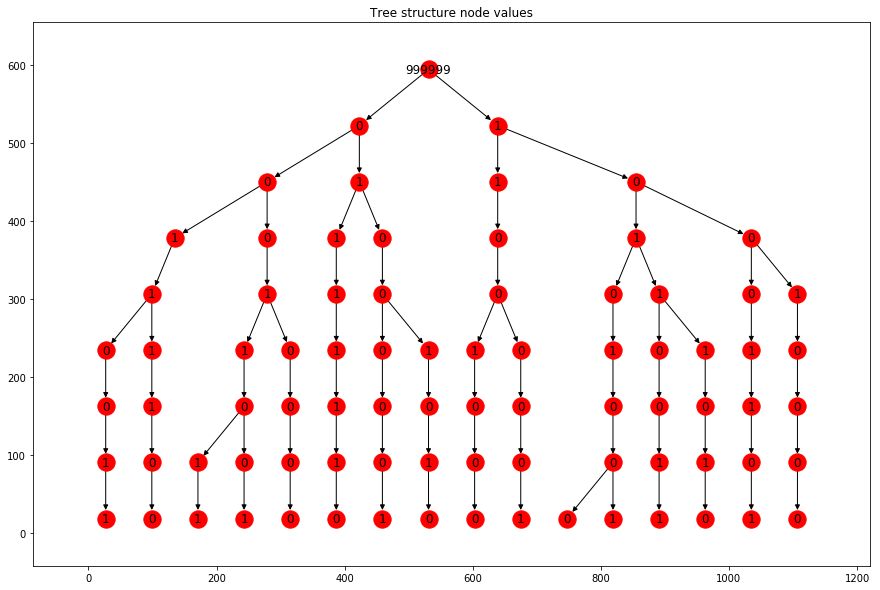

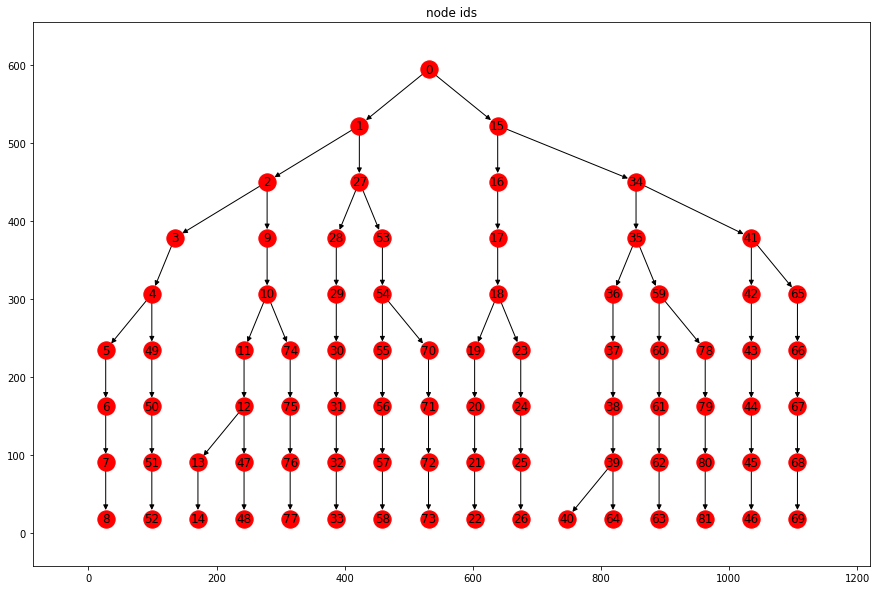

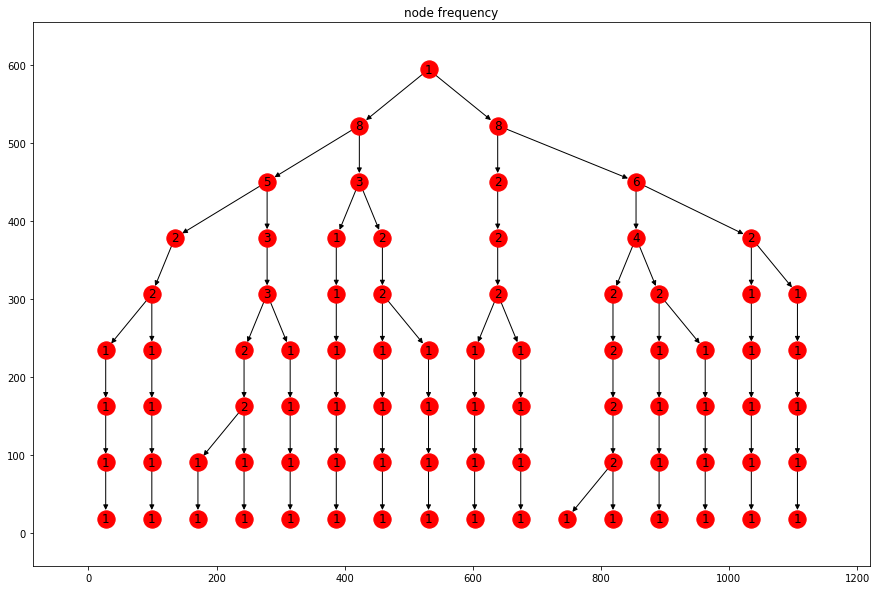

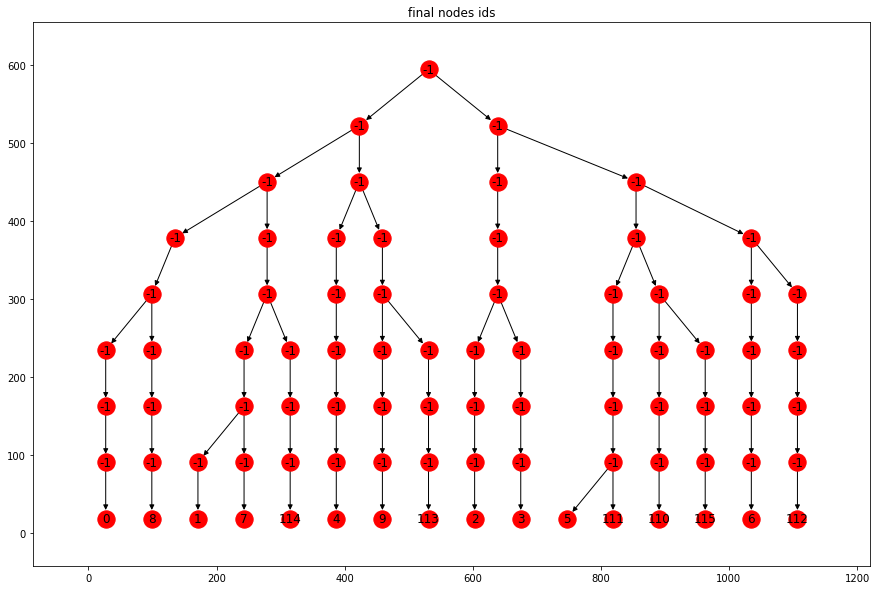

In [29]:
import os
import sys

sys.path.append("/home/matei/Documents/code/taniyanAgac/agac/modules")

from BaseStructure import BaseStructure

spektron= BaseStructure()

for i in range(16):
    p = spektron.addBranch(symbols[i])
    
    print(p,"Before",spektron.agac.node[p]["id"] )
    if(i<10):
        spektron.agac.node[p]["id"] = i
    else:
        spektron.agac.node[p]["id"] = 100+i
    print("After",spektron.agac.node[p]["id"] )
    
spektron.plotGraph()

# Symbol Buffer for Expression Building

In [44]:

#for i in range(len(b)):
print ("All symbols = ",len(b))   

print ( "All expressions =" , len(b)/5)   
print("One Symbols's length",len(b[0]), b[0])
    
print(np.concatenate(b)[:40])
nodeID = spektron.checkBranch(b[0])
print ( "ID of first symbol in first expression ", nodeID, spektro )


All symbols =  3230
All expressions = 646.0
One Symbols's length 8 [0 1 1 1 1 1 1 0]
[0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1]
ID of first symbol in first expression  33


# Learning Tree

In [2]:
from mvpa2.suite import *

ModuleNotFoundError: No module named 'mvpa2'

In [1]:
from mvpa2.suite import *

ModuleNotFoundError: No module named 'mvpa2'

In [ ]:
colors = np.array(
         [[0., 0., 0.],
          [0., 0., 1.],
          [0., 0., 0.5],
          [0.125, 0.529, 1.0],
          [0.33, 0.4, 0.67],
          [0.6, 0.5, 1.0],
          [0., 1., 0.],
          [1., 0., 0.],
          [0., 1., 1.],
          [1., 0., 1.],
          [1., 1., 0.],
          [1., 1., 1.],
          [.33, .33, .33],
          [.5, .5, .5],
          [.66, .66, .66]])

# store the names of the colors for visualization later on
color_names = \
        ['black', 'blue', 'darkblue', 'skyblue',
         'greyblue', 'lilac', 'green', 'red',
         'cyan', 'violet', 'yellow', 'white',
         'darkgrey', 'mediumgrey', 'lightgrey']

In [ ]:
som = SimpleSOMMapper((20, 30), 400, learning_rate=0.05)

In [ ]:
som.train(colors)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(som.K, origin='lower')
mapped = som(colors)

plt.title('Color SOM')
# SOM's kshape is (rows x columns), while matplotlib wants (X x Y)
for i, m in enumerate(mapped):
    pl.text(m[1], m[0], color_names[i], ha='center', va='center',
           bbox=dict(facecolor='white', alpha=0.5, lw=0))